# Big Data Mart Sales Prediction

Importing all the required libraries

In [1107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time
import warnings
warnings.filterwarnings('ignore')

Reading train and test data sets

In [1108]:
train_data=pd.read_csv('C:/Users/yn/Desktop/Yuvi/DataTrained/PracticeProjets/bigdatamart_Train.csv')
test_data=pd.read_csv('C:/Users/yn/Desktop/Yuvi/DataTrained/PracticeProjets/bigdatamart_Test.csv')
train_data['SourceType']='Train'
test_data['SourceType']='Test'
data=pd.concat([train_data,test_data],ignore_index=True)
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,SourceType
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,Train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Train


In [1109]:
data.shape

(14204, 13)

In [1110]:
train_data.shape

(8523, 13)

We have 8523 rows and 13 columns in training set

In [1111]:
test_data.shape

(5681, 12)

We have 5681 rows and 12 columns in test set

## Exploratory Data Analysis

In [1112]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


1. We have misisng values in Item weight.
2. Looks like some missing values(value = 0) or outliers in Item visibility


In [1113]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [1114]:
(data['Item_Visibility']==0).sum()

879

879 rows having Item Visibility as 0, which is not logically possible. So we will fill these values with mean value of the column.

In [1115]:
item_mean=data['Item_Visibility'].mean()
data['Item_Visibility']=[item_mean if x==0 else x for x in data['Item_Visibility'] ]
data['Item_Visibility'].value_counts()

0.065953    879
0.076841      3
0.076483      3
0.076856      3
0.077169      3
           ... 
0.059281      1
0.019228      1
0.011172      1
0.044900      1
0.031007      1
Name: Item_Visibility, Length: 13006, dtype: int64

In [1116]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.070034,141.004977,1997.830681,2181.288914
std,4.652502,0.048602,62.086938,8.371664,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,8.710000,0.033143,94.012000,1987.000000,834.247400
50%,12.600000,0.062347,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [1117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  SourceType                 14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

### Finding and filling missing values

In [1118]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
SourceType                      0
dtype: int64

In [1119]:
from sklearn.impute import SimpleImputer

In [1120]:
sim_imp=SimpleImputer(strategy='mean')
sim_imp=sim_imp.fit(data[['Item_Weight']])
data['Item_Weight']=sim_imp.transform(data[['Item_Weight']])

In [1121]:
sim_imp=SimpleImputer(strategy='most_frequent')
sim_imp=sim_imp.fit(data[['Outlet_Size']])
data['Outlet_Size']=sim_imp.transform(data[['Outlet_Size']])

In [1122]:
sim_imp=SimpleImputer(strategy='mean')
sim_imp=sim_imp.fit(data[['Item_Outlet_Sales']])
data['Item_Outlet_Sales']=sim_imp.transform(data[['Item_Outlet_Sales']])

In [1123]:
data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
SourceType                   0
dtype: int64

In [1124]:
data.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,SourceType
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,2181.288914,Test
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,2181.288914,Test
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1,2181.288914,Test
14202,FDJ26,15.3,Regular,0.065953,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1,2181.288914,Test
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,Medium,Tier 2,Supermarket Type1,2181.288914,Test


#### spliting the features as categorical and continous features

In [1125]:
catg_columns=['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']
continous_columns=['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


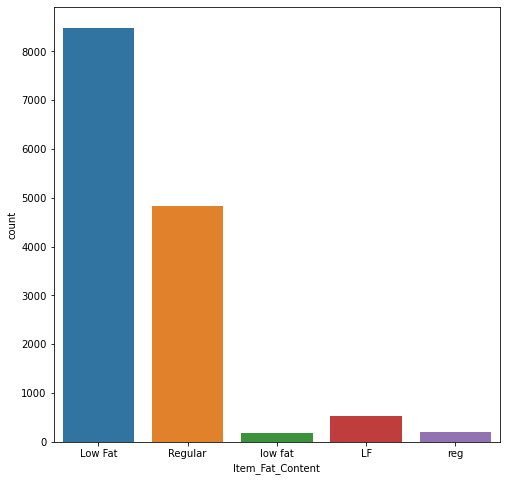

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


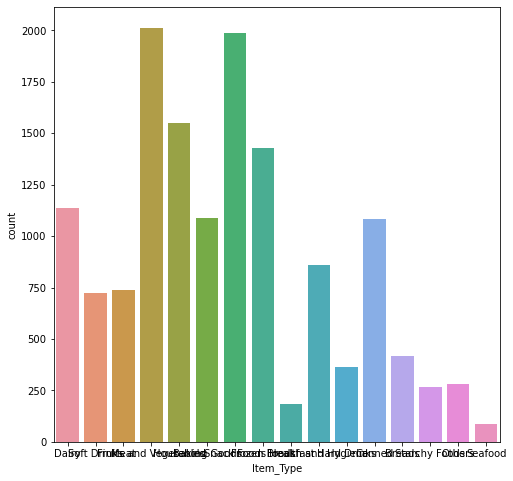

OUT027    935
OUT013    932
OUT035    930
OUT046    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


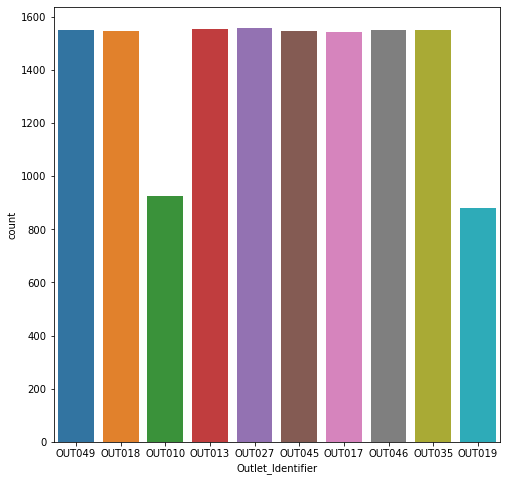

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


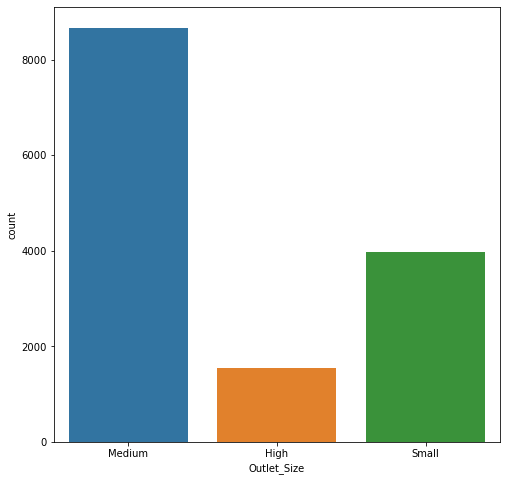

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


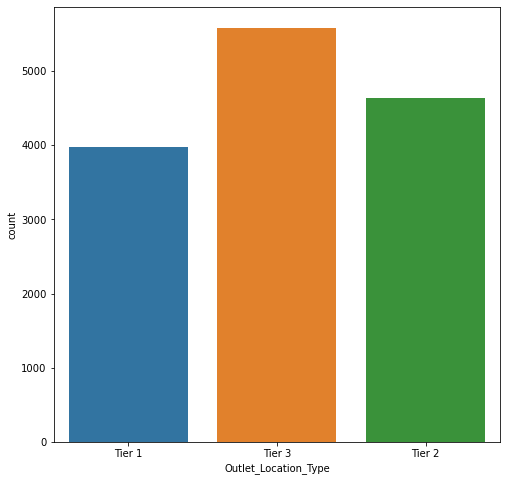

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


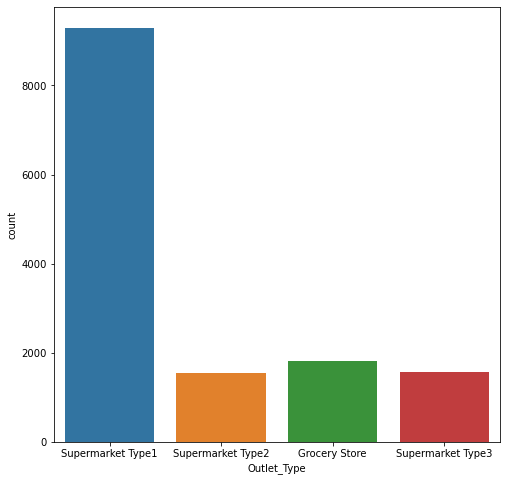

In [1126]:
for col in catg_columns:
    print(train_data[col].value_counts())
    plt.figure(figsize=(8,8))
    sns.countplot(data[col])
    plt.show()

We have some values to be corrected in Item_Fat_content.
Need to map 
LF, low fat = Low Fat && 
reg = Regular

In [1127]:
data['Item_Fat_Content']=data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


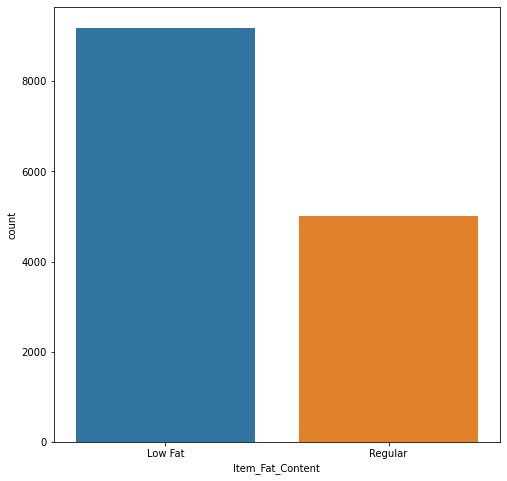

In [1128]:
print(data['Item_Fat_Content'].value_counts())
plt.figure(figsize=(8,8))
sns.countplot(data['Item_Fat_Content'])
plt.show()

In [1129]:
train_data=data[data['SourceType']=='Train']
test_data=data[data['SourceType']=='Test']

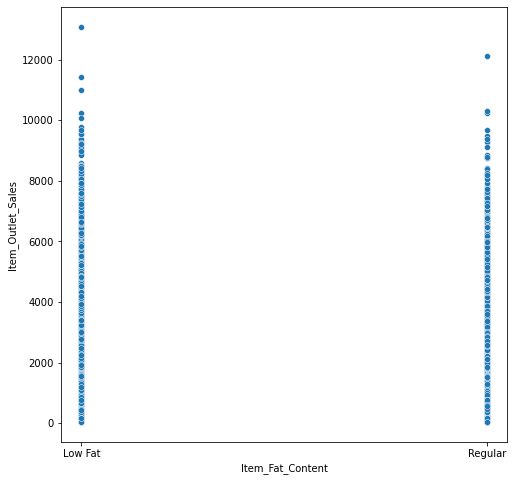

In [1130]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=train_data['Item_Fat_Content'],y=train_data['Item_Outlet_Sales'])
plt.show()

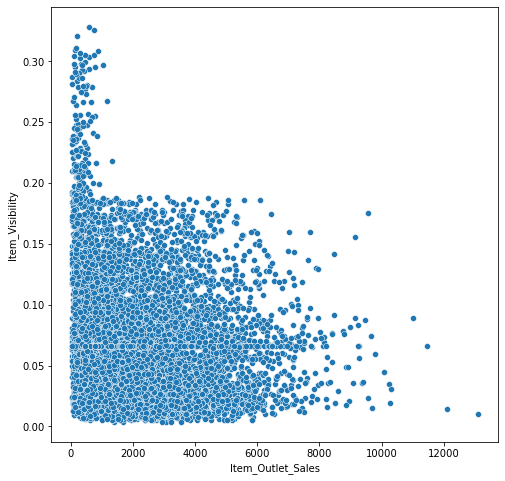

In [1131]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=train_data['Item_Outlet_Sales'],y=train_data['Item_Visibility'])
plt.show()


1. Item visibility below 0.20 are having more sales.

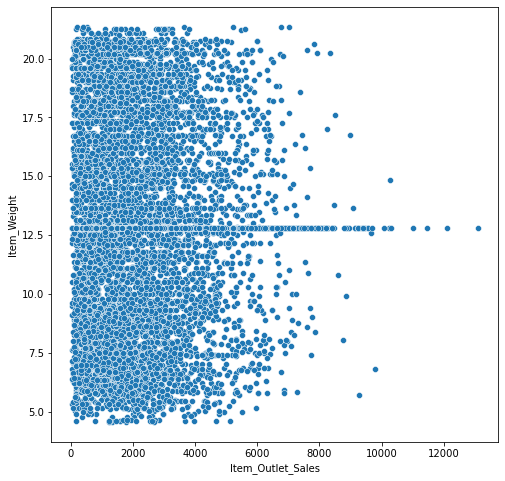

In [1132]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=train_data['Item_Outlet_Sales'],y=train_data['Item_Weight'])
plt.show()

Could not see any trend based on Item_Weight.

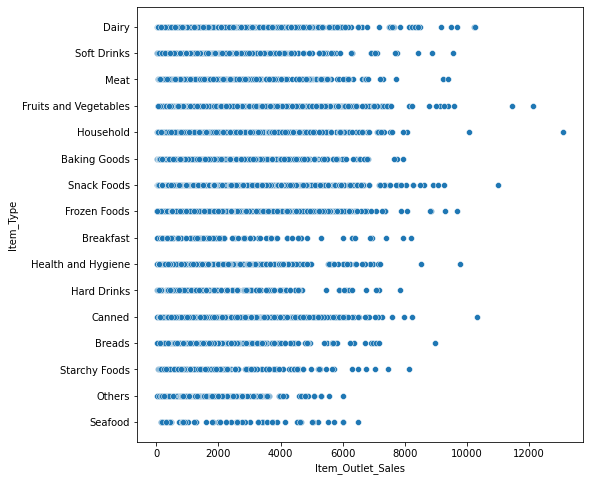

In [1133]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=train_data['Item_Outlet_Sales'],y=train_data['Item_Type'])
plt.show()

1. Looks like Dairy products are having more sales

<Figure size 576x576 with 0 Axes>

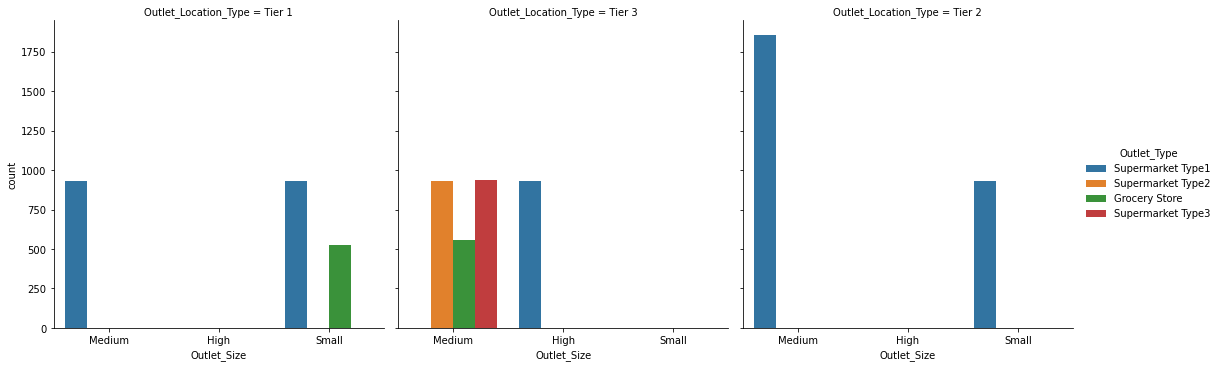

In [1134]:
plt.figure(figsize=(8,8))
sns.catplot(x='Outlet_Size',hue='Outlet_Type',kind='count',data=train_data,col='Outlet_Location_Type')
plt.show()

1. In tier2 location type we have all small size Supermarket Type1 outlets.

<Figure size 576x576 with 0 Axes>

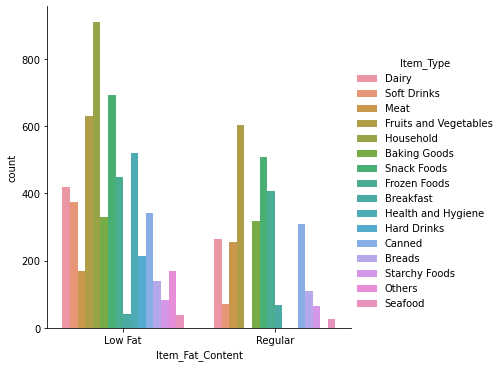

In [1135]:
plt.figure(figsize=(8,8))
sns.catplot(x='Item_Fat_Content',hue='Item_Type',kind='count',data=train_data)
plt.show()

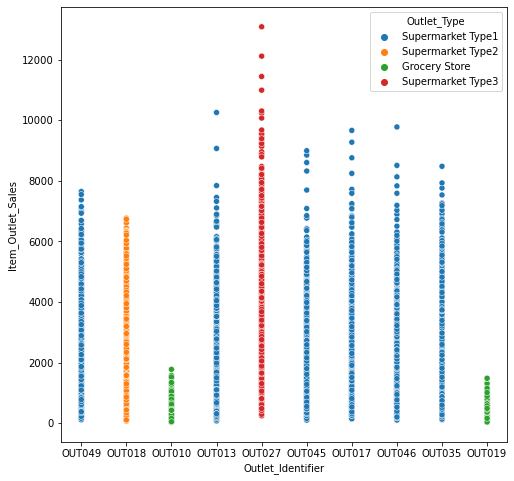

In [1136]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=train_data['Outlet_Identifier'],y=train_data['Item_Outlet_Sales'],hue=train_data['Outlet_Type'])
plt.show()

1. Super market type3 Outlet has more sales.
2. Grocery stores are having less sales

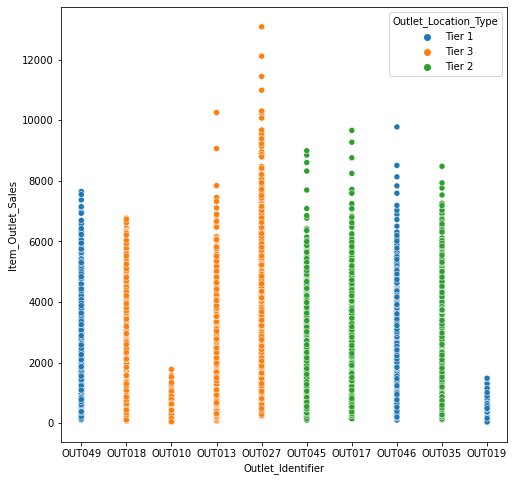

In [1137]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=train_data['Outlet_Identifier'],y=train_data['Item_Outlet_Sales'],hue=train_data['Outlet_Location_Type'])
plt.show()

1. OUT027 belongs to Tier3 type location

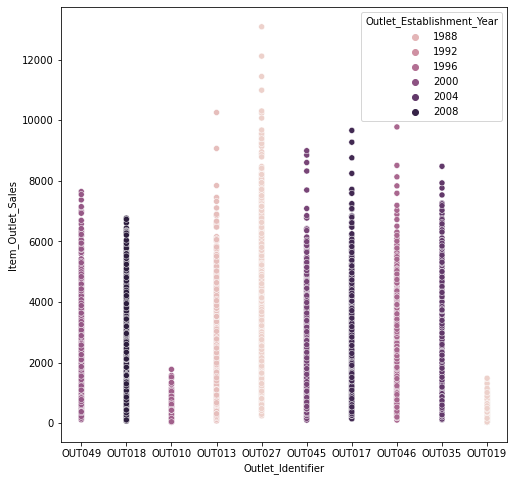

In [1138]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=train_data['Outlet_Identifier'],y=train_data['Item_Outlet_Sales'],hue=train_data['Outlet_Establishment_Year'])
plt.show()

OUT27 is started in 1988

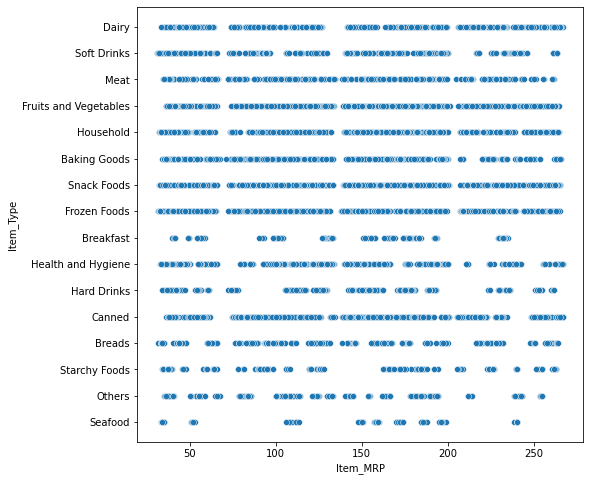

In [1139]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=train_data['Item_MRP'],y=train_data['Item_Type'])
plt.show()

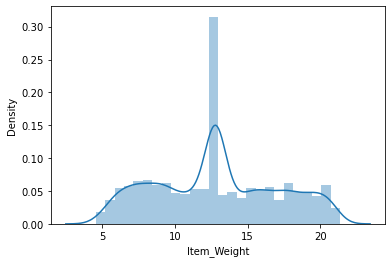

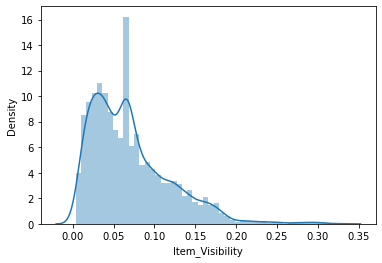

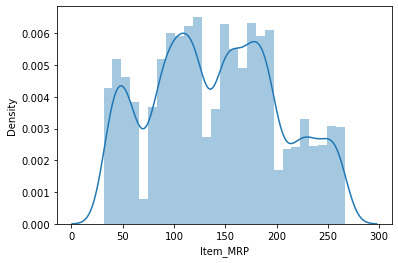

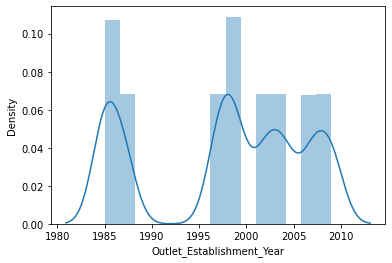

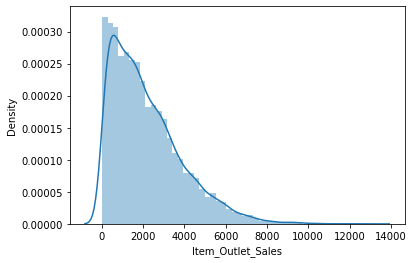

In [1140]:
for col in continous_columns:
    sns.distplot(train_data[col])
    plt.show()

1. Item_Visibility is having right skewed data

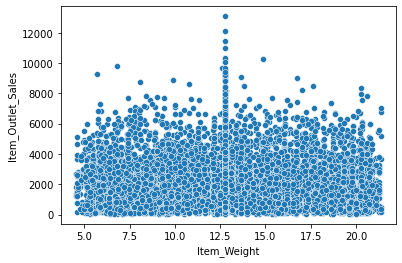

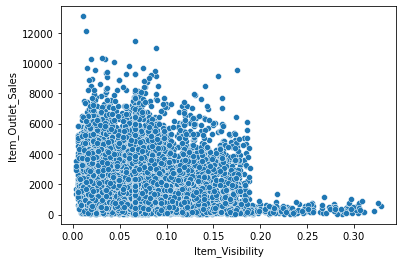

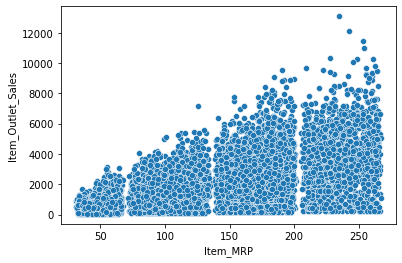

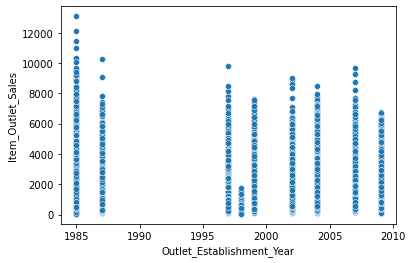

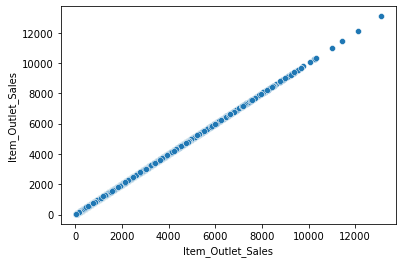

In [1141]:
for col in continous_columns:
    sns.scatterplot(x=train_data[col],y=train_data['Item_Outlet_Sales'])
    plt.show()

When Item_MRP is high, sales also high.

Lets drop Item_Weigth column as could not see any trend for target variable.

##### Fining outliers

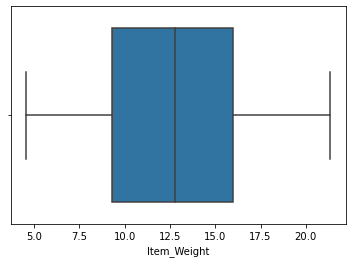

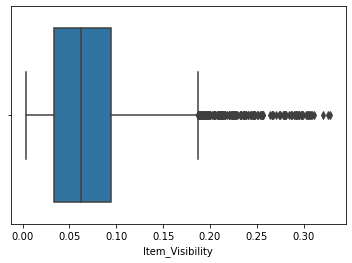

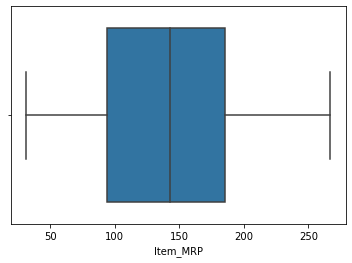

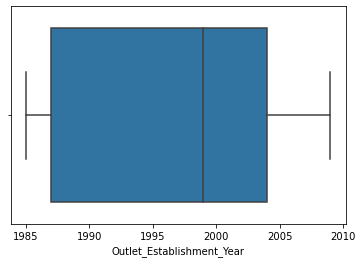

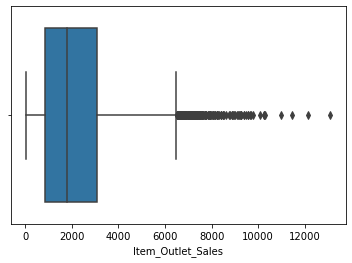

In [1142]:
train_data=data[data['SourceType']=='Train']
test_data=data[data['SourceType']=='Test']
for col in continous_columns:
    sns.boxplot(train_data[col])
    plt.show()

In [1143]:
train_data=data[data['SourceType']=='Train']
test_data=data[data['SourceType']=='Test']
train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,SourceType
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Train
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Train
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Train
3,FDX07,19.200,Regular,0.065953,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Train
4,NCD19,8.930,Low Fat,0.065953,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,Train
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,Train
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,Train
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,Train


#### Removing outliers

In [1144]:
q1=train_data.quantile(0.25)
q3=train_data.quantile(0.75)
iqr=q3-q1

In [1145]:
vis_high=q3.Item_Visibility+(1.5*iqr.Item_Visibility)
index=np.where(train_data['Item_Visibility']>vis_high)
train_data=train_data.drop(train_data.index[index])
train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,SourceType
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Train
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Train
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Train
3,FDX07,19.200,Regular,0.065953,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Train
4,NCD19,8.930,Low Fat,0.065953,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,Train
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,Train
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,Train
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,Train


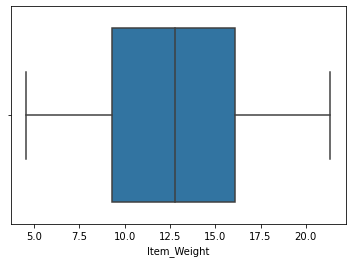

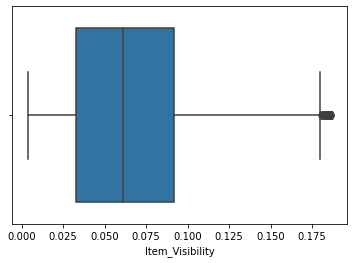

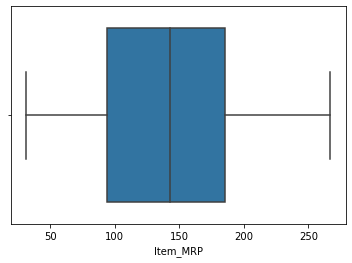

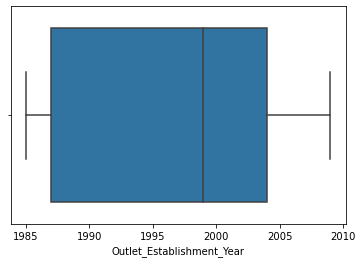

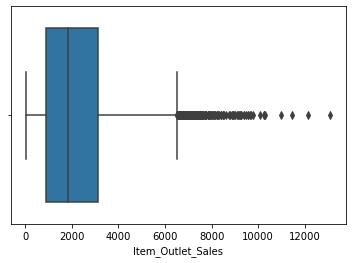

In [1146]:
for col in continous_columns:
    sns.boxplot(train_data[col])
    plt.show()

In [1147]:
train_data.skew()

Item_Weight                  0.095655
Item_Visibility              0.789291
Item_MRP                     0.128824
Outlet_Establishment_Year   -0.416425
Item_Outlet_Sales            1.170905
dtype: float64

Now the data looks good and there is no skewness.

In [1148]:
data=pd.concat([train_data,test_data],ignore_index=True)
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,SourceType
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138000,Train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.422800,Train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.270000,Train
3,FDX07,19.20,Regular,0.065953,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.380000,Train
4,NCD19,8.93,Low Fat,0.065953,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.705200,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14026,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,2181.288914,Test
14027,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,2181.288914,Test
14028,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1,2181.288914,Test
14029,FDJ26,15.30,Regular,0.065953,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1,2181.288914,Test


In [1149]:
data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
SourceType                   0
dtype: int64

#### Encoding the categorical columns to numbers

In [1150]:
from sklearn.preprocessing import LabelEncoder

In [1151]:
catg_col=['Item_Fat_Content','Outlet_Identifier','Outlet_Type','Item_Type','Outlet_Size','Outlet_Location_Type']
for col in catg_col:
    lb_enc=LabelEncoder()
    data[col]=lb_enc.fit_transform(data[col])
data


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,SourceType
0,FDA15,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.138000,Train
1,DRC01,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.422800,Train
2,FDN15,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.270000,Train
3,FDX07,19.20,1,0.065953,6,182.0950,0,1998,1,2,0,732.380000,Train
4,NCD19,8.93,0,0.065953,9,53.8614,1,1987,0,2,1,994.705200,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14026,FDB58,10.50,1,0.013496,13,141.3154,8,1997,2,0,1,2181.288914,Test
14027,FDD47,7.60,1,0.142991,15,169.1448,3,2009,1,2,2,2181.288914,Test
14028,NCO17,10.00,0,0.073529,8,118.7440,7,2002,1,1,1,2181.288914,Test
14029,FDJ26,15.30,1,0.065953,3,214.6218,2,2007,1,1,1,2181.288914,Test


In [1152]:
data.shape

(14031, 13)

#### Finsing multi-colinearity

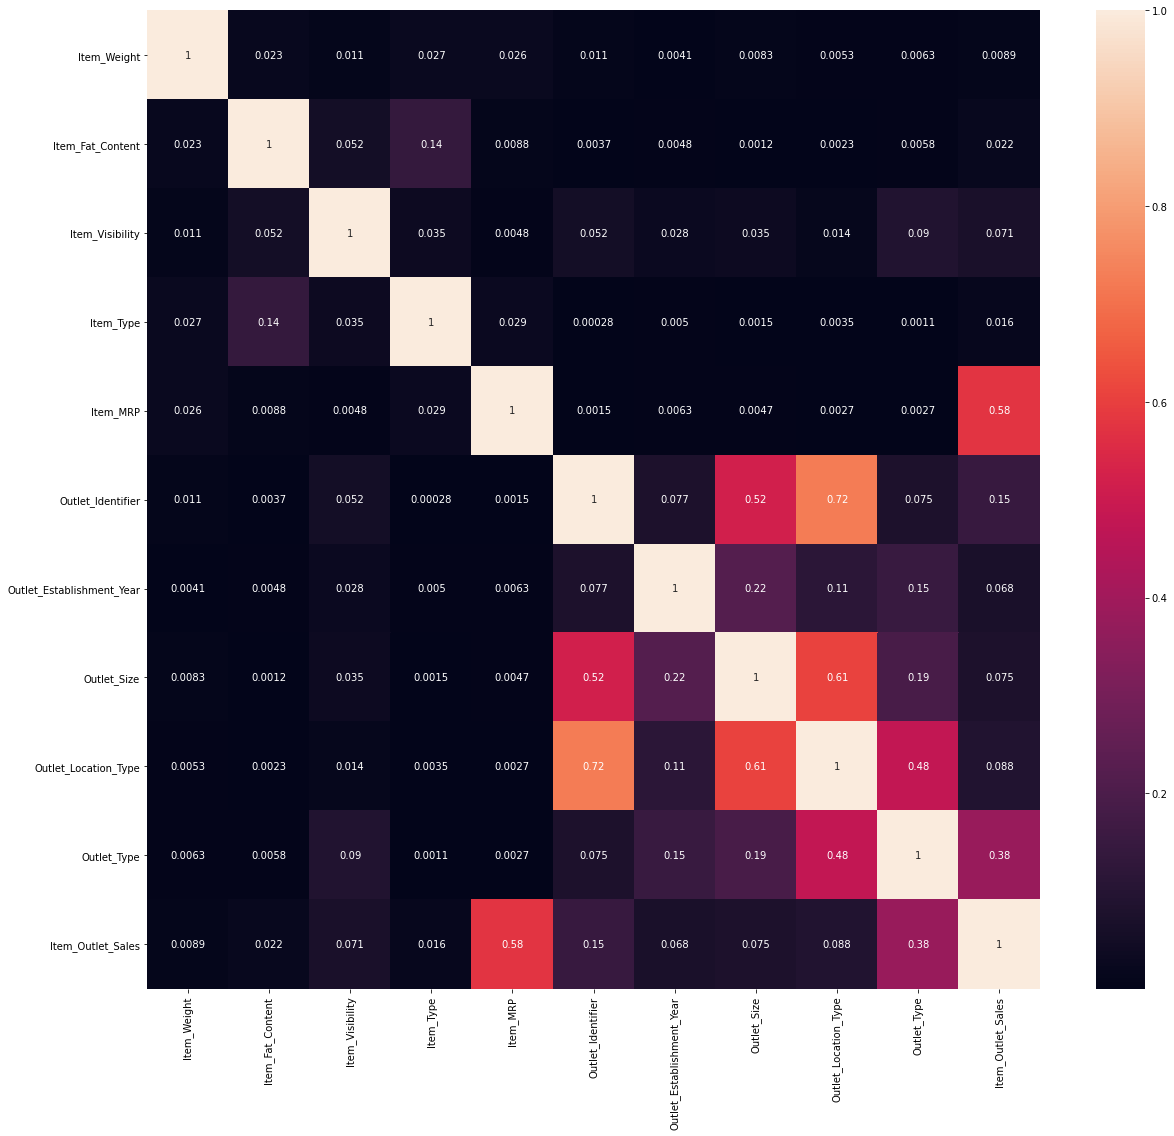

In [1153]:
train_data=data[data['SourceType']=='Train']
plt.figure(figsize=(20,18))
sns.heatmap(train_data.corr().abs(),annot=True)
plt.show()

1. Item_MRP is 58% correlated with Item Outlet sales
2. Outlet_type is 38% correlatd with Item Outlet sales

In [1154]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'SourceType'],
      dtype='object')

In [1155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14031 entries, 0 to 14030
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14031 non-null  object 
 1   Item_Weight                14031 non-null  float64
 2   Item_Fat_Content           14031 non-null  int32  
 3   Item_Visibility            14031 non-null  float64
 4   Item_Type                  14031 non-null  int32  
 5   Item_MRP                   14031 non-null  float64
 6   Outlet_Identifier          14031 non-null  int32  
 7   Outlet_Establishment_Year  14031 non-null  int64  
 8   Outlet_Size                14031 non-null  int32  
 9   Outlet_Location_Type       14031 non-null  int32  
 10  Outlet_Type                14031 non-null  int32  
 11  Item_Outlet_Sales          14031 non-null  float64
 12  SourceType                 14031 non-null  object 
dtypes: float64(4), int32(6), int64(1), object(2)
m

## Building and selecting models

spliting the train and test data back

In [1156]:
train_data=data[data['SourceType']=='Train']
test_data=data[data['SourceType']=='Test']

Spliting features and label from train data

In [1157]:
X=train_data.drop(['SourceType','Item_Outlet_Sales','Item_Identifier','Item_Weight'],axis=1)
y=train_data['Item_Outlet_Sales']

In [1158]:
X.shape

(8350, 9)

In [1059]:
y.shape

(8350,)

##### scaling the feature data to standard scale

In [1159]:
X_sc=StandardScaler().fit_transform(X)

importing the libraries

In [1160]:
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score
import xgboost
from xgboost import XGBRegressor

Finding the best Random State to split the train and test data.

In [1161]:
m_acc=0
rs=0
for i in range(1,100):
    X_train,X_test,y_train,y_test=train_test_split(X_sc,y,test_size=0.25,random_state=i)
    lr=LinearRegression()
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_test)
    acc=r2_score(y_test,y_pred)
    if(acc>m_acc):
        m_acc=acc
        rs=i
print('Accuracy: ',m_acc,'RS: ',rs)

Accuracy:  0.5320688106921034 RS:  35


spliting the train and test set using the best Random state found

In [1063]:
X_train,X_test,y_train,y_test=train_test_split(X_sc,y,test_size=0.25,random_state=35)

### Building base models

In [1162]:
lr=LinearRegression()
rf_reg=RandomForestRegressor()
dt_reg=DecisionTreeRegressor()
kn_reg=KNeighborsRegressor()
gb_reg=GradientBoostingRegressor()
ls=Lasso()
xgb=XGBRegressor()

In [1163]:
model=[lr,rf_reg,dt_reg,kn_reg,xgb,ls,gb_reg]
for m in model:
    m.fit(X_train,y_train)
    y_pred=m.predict(X_test)
    print('Metrics for ',m)
    print('Accuracy score: ',r2_score(y_test,y_pred))
    print('Mean Absolute Error: ',mean_absolute_error(y_test,y_pred))
    print('Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,y_pred)),'\n')


Metrics for  LinearRegression()
Accuracy score:  0.5057789019740442
Mean Absolute Error:  891.494354532536
Mean Squared Error:  1187.3817690119313 

Metrics for  RandomForestRegressor()
Accuracy score:  0.5447895450588386
Mean Absolute Error:  799.7475635957854
Mean Squared Error:  1139.5564665237123 

Metrics for  DecisionTreeRegressor()
Accuracy score:  0.15514138974248193
Mean Absolute Error:  1089.570539559387
Mean Squared Error:  1552.4647685221616 

Metrics for  KNeighborsRegressor()
Accuracy score:  0.5062729737474537
Mean Absolute Error:  837.9763901915709
Mean Squared Error:  1186.788109098739 

Metrics for  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constr

### Cross validation score

In [1164]:
for m in model:
    print("Cross val score for ",m,cross_val_score(m,X_sc,y,cv=5).mean())

Cross val score for  LinearRegression() 0.5027602975898693
Cross val score for  RandomForestRegressor() 0.5382772540807944
Cross val score for  DecisionTreeRegressor() 0.13856377913972082
Cross val score for  KNeighborsRegressor() 0.4938532051675832
Cross val score for  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None) 0.5212016882045274
Cross val score for  Lasso() 0.5027976993127168
Cross val score for  GradientBoos

### Conclusion

GradientBoostingRegressor has low RMSE and better Cross validation score. Our base models and cross validation scores shows GradientBoostingRegressor algorithm performs better than other models.

### Hyper parameter tuning

In [839]:
from sklearn.model_selection import GridSearchCV

In [1067]:
#param={'max_depth':[4,5,7],'max_features':["auto", "sqrt", "log2"],'n_estimators':[60,70,80,90]}
param={'learning_rate':[0.05,0.08,0.1],'n_estimators':[80,90,100,105,110],'max_features':['auto', 'sqrt', 'log2']}
grd_srch=GridSearchCV(GradientBoostingRegressor(),param_grid=param)
grd_srch.fit(X_train,y_train)
print(grd_srch.best_estimator_)
print(grd_srch.best_score_)

GradientBoostingRegressor(learning_rate=0.08, max_features='log2',
                          n_estimators=105)
0.5807528770173966


Finding the best Random State for the model

In [1068]:
r_mean=0
rs=0
for i in range(1,140):
    gb_reg=GradientBoostingRegressor(learning_rate=0.08,random_state=i,max_features='log2',n_estimators=105)
    gb_reg.fit(X_train,y_train)
    y_pred=gb_reg.predict(X_test)
    r_mean_square=np.sqrt(mean_squared_error(y_test,y_pred))
    if(r_mean==0):
        r_mean=r_mean_square
    elif(r_mean_square<r_mean):
        r_mean=r_mean_square
        rs=i
print("Best error: ",r_mean,"RS: ",rs)
gb_reg=GradientBoostingRegressor(learning_rate=0.08,random_state=rs,max_features='log2',n_estimators=105)
gb_reg.fit(X_train,y_train)
y_pred=gb_reg.predict(X_test)
print('Accuracy: ',r2_score(y_test,y_pred))
print('Mean Absolute Error: ',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,y_pred)))

Best error:  1052.8986191269514 RS:  13
Accuracy:  0.615539284928567
Mean Absolute Error:  753.438551700446
Mean Squared Error:  1052.8986191269514


#### Final model

In [1069]:
final_model=GradientBoostingRegressor(learning_rate=0.08,random_state=13,max_features='log2',n_estimators=105)
final_model.fit(X_train,y_train)
y_pred=final_model.predict(X_test)
print('Train Accuracy: ',final_model.score(X_train,y_train))
print('Train Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_train,rf_reg.predict(X_train))))
print('Test Accuracy: ',r2_score(y_test,y_pred))
print('Test Mean Absolute Error: ',mean_absolute_error(y_test,y_pred))
print('Test Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,y_pred)))

Train Accuracy:  0.6064711536794519
Train Root Mean Squared Error:  431.47748656836313
Test Accuracy:  0.615539284928567
Test Mean Absolute Error:  753.438551700446
Test Root Mean Squared Error:  1052.8986191269514


#### Final model able to provide upto 62% of accuracy and 1053 RMSE.

### Saving the test data as CSV

In [1165]:
test_data_cleaned=test_data.copy()

In [1166]:
test_data.drop(['Item_Outlet_Sales','SourceType','Item_Identifier','Item_Weight'],axis=1,inplace=True)

In [1168]:
test_data.columns

Index(['Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [1169]:
test_data.shape

(5681, 9)

In [1170]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5681 entries, 8350 to 14030
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Fat_Content           5681 non-null   int32  
 1   Item_Visibility            5681 non-null   float64
 2   Item_Type                  5681 non-null   int32  
 3   Item_MRP                   5681 non-null   float64
 4   Outlet_Identifier          5681 non-null   int32  
 5   Outlet_Establishment_Year  5681 non-null   int64  
 6   Outlet_Size                5681 non-null   int32  
 7   Outlet_Location_Type       5681 non-null   int32  
 8   Outlet_Type                5681 non-null   int32  
dtypes: float64(2), int32(6), int64(1)
memory usage: 310.7 KB


In [1171]:
test_data.to_csv('C:/Users/yn/Desktop/Yuvi/DataTrained/Saved Models- Practice Projects/BigDataMartSales_Cleaned_Test.csv')

### Saving the final model

In [1172]:
import pickle

In [1173]:
pickle.dump(final_model,open('C:/Users/yn/Desktop/Yuvi/DataTrained/Saved Models- Practice Projects/BigDataMartSalesPrediction.pkl','wb'))

In [1174]:
model=pickle.load(open('C:/Users/yn/Desktop/Yuvi/DataTrained/Saved Models- Practice Projects/BigDataMartSalesPrediction.pkl','rb'))

In [1175]:
final_test_data=pd.read_csv('C:/Users/yn/Desktop/Yuvi/DataTrained/Saved Models- Practice Projects/BigDataMartSales_Cleaned_Test.csv')

In [1176]:
final_test_data.columns

Index(['Unnamed: 0', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [1177]:
final_test_data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [1178]:
final_test_data.shape

(5681, 9)

In [1179]:
y_pred=model.predict(final_test_data)
final_output=pd.DataFrame({'Item Identifier':test_data_cleaned['Item_Identifier'],'Predicted_Outlet_sales':y_pred})
final_output

,Item Identifier,Predicted_Outlet_sales
8350,FDW58,4474.496215
8351,FDW14,4882.133672
8352,NCN55,4593.758599
8353,FDQ58,4662.777770
8354,FDY38,5344.204888
...,...,...
14026,FDB58,4699.813326
14027,FDD47,5344.204888
14028,NCO17,4662.777770
14029,FDJ26,4882.133672
